# Time series clustering based on autocorrelation

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from statsmodels.tsa.arima_process import ArmaProcess

/Users/willie/.local/share/virtualenvs/time-series-demos-svg3QhUy/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


## 1 Generate time series dataset

In [2]:
# Define the ARMA processes. AR params must be negated. See
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html
processes = [
    ArmaProcess.from_coeffs([0.0], [0.0]),
    ArmaProcess.from_coeffs([-0.5], [0.0]),
    ArmaProcess.from_coeffs([0.0], [0.9])
]

In [3]:
# Generate the time series.
df = pd.DataFrame()
for i in range(12):
    df[f"TS_{i}"] = processes[i // 4].generate_sample(500)

In [4]:
df.head(10)

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,TS_11
0,-1.485098,-0.700778,0.869353,-0.085446,0.908413,-0.080687,0.170571,0.384774,0.934812,0.827518,-0.777414,-0.511304
1,0.681329,0.203212,0.535111,-1.635863,-3.898731,-0.335155,0.028502,-0.631035,1.205086,2.487594,-0.958336,0.460274
2,-0.577994,-0.371957,0.232533,-0.481803,1.537909,-0.802081,0.696499,1.169471,0.729780,2.704759,-0.028234,1.847080
3,-1.232050,-0.846312,0.092187,0.147170,0.456396,1.383731,-2.958076,-1.841845,1.451613,2.150478,-0.168882,2.176163
4,0.291283,-1.143063,0.590837,-0.539450,-0.347219,-1.309658,2.095708,1.267040,2.214962,0.391728,-1.440047,2.682409
5,-0.248403,0.736959,-1.225506,-0.643361,-0.913646,-0.634237,-0.201444,1.648385,2.174870,0.127775,-1.406321,2.447899
6,-0.338209,-1.190491,1.174899,-0.623741,0.474136,-1.419244,1.054377,0.841597,1.836185,1.437529,1.304303,0.203222
7,-0.953578,0.056242,0.104875,-0.005817,-0.131631,1.617523,-1.686792,0.583941,1.152627,-1.005159,2.262162,-1.207866
8,1.459665,1.191890,1.741101,-0.829204,0.571561,-0.465576,-0.019791,-0.627816,0.573342,-2.195708,0.761351,-0.492013
9,-1.393236,0.112373,-0.713317,1.608733,0.030085,1.286995,1.042988,0.975033,0.022043,-0.865328,0.088335,-0.483871


In [5]:
def plot_df(df, lower, upper, process):
    title = f"TS {lower}-{upper-1}\n{process}"
    df.iloc[:, lower:upper].plot(title=title, figsize=(12, 4), alpha=0.4)
    plt.show()

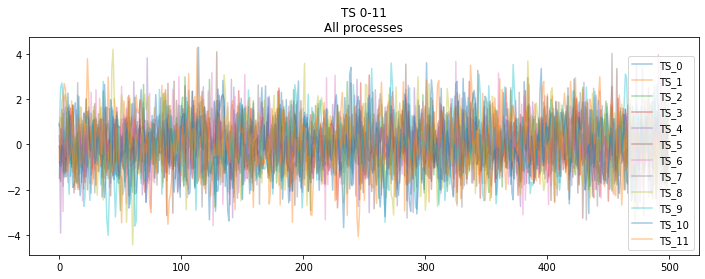

In [6]:
plot_df(df, 0, 12, "All processes")

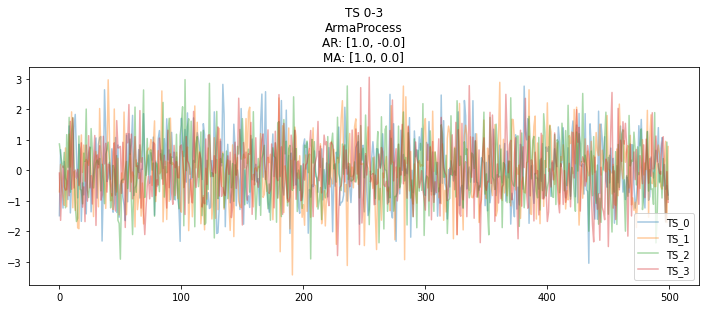

In [7]:
plot_df(df, 0, 4, processes[0])

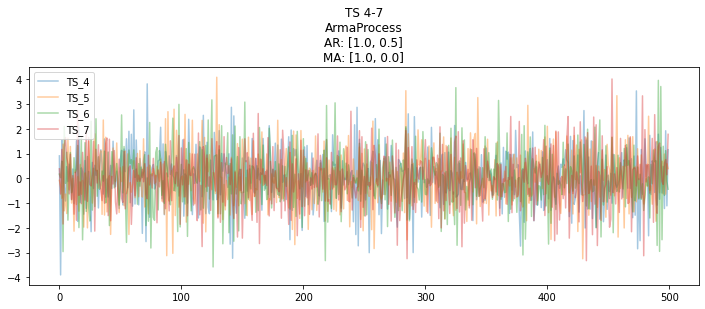

In [8]:
plot_df(df, 4, 8, processes[1])

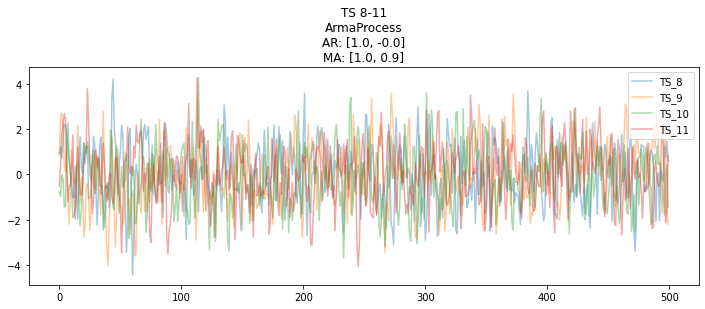

In [9]:
plot_df(df, 8, 12, processes[2])

## 2 Estimate ACFs 

In [10]:
max_lag = 10
lag_arr = np.repeat(max_lag, df.shape[1])
acf_list = list(map(sm.tsa.acf, df.transpose().to_numpy(), lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = df.columns

In [11]:
acf_df.head(10)

,TS_0,TS_1,TS_2,TS_3,TS_4,TS_5,TS_6,TS_7,TS_8,TS_9,TS_10,TS_11
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.005716,0.010739,-0.056154,-0.061071,-0.471462,-0.508271,-0.526375,-0.530039,0.442069,0.502429,0.469288,0.468294
2,-0.024374,0.009166,-0.029707,0.020989,0.200208,0.252337,0.230186,0.241329,-0.100646,0.019705,-0.032243,-0.048655
3,-0.093500,-0.039265,-0.056386,-0.004921,-0.087125,-0.131891,-0.111745,-0.141098,-0.074586,0.045786,-0.028084,-0.029524
4,-0.030766,-0.006917,0.067981,-0.032689,0.039633,0.083483,0.015175,0.083099,-0.023203,0.036100,-0.054095,-0.000873
5,-0.032204,0.014132,0.017625,0.073695,-0.088914,-0.062342,0.007541,-0.052702,0.024972,-0.001482,-0.066792,0.041017
6,-0.032547,-0.062953,-0.018532,-0.095818,0.124724,-0.018131,0.028808,0.028196,-0.011086,0.047901,-0.079444,0.047892
7,0.040825,-0.070432,-0.052437,0.013488,-0.076841,0.064500,-0.054125,0.007517,-0.081453,0.075207,-0.063047,-0.038227
8,0.000437,-0.036502,-0.010213,-0.034431,0.001909,-0.061034,0.067396,0.051885,-0.099134,0.057748,-0.088370,-0.065156
9,0.100609,0.024027,0.054568,0.070807,0.034630,0.075319,-0.004222,-0.110736,-0.057274,0.089481,-0.097317,0.037162


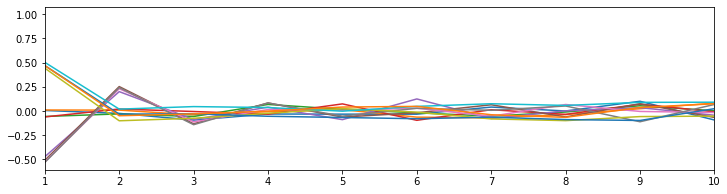

In [12]:
plt.figure(figsize=(12, 3))
plt.xlim((1, max_lag))
plt.plot(acf_df)
plt.show()

## 3 Find clusters

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(acf_df.transpose())
kmeans.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

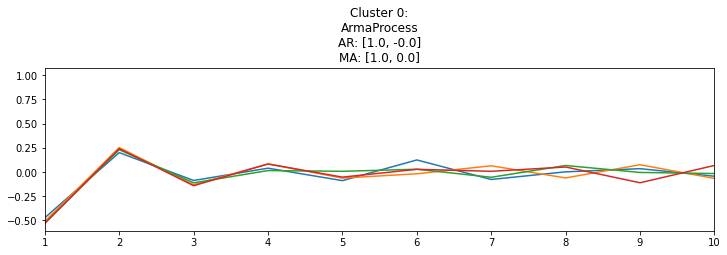

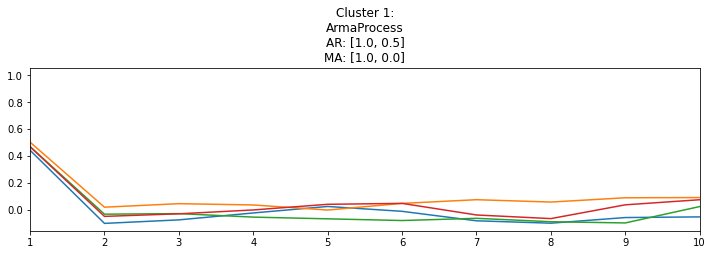

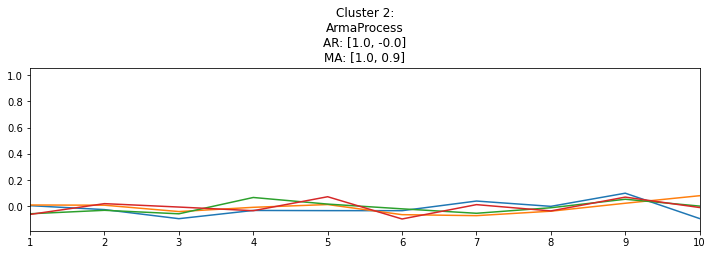

In [14]:
for i in range(3):
    plt.figure(figsize=(12, 3))
    plt.xlim((1, max_lag))
    for j in range(acf_df.shape[1]):
        if kmeans.labels_[j] == i:
            plt.title(f"Cluster {i}:\n{processes[i]}")
            plt.plot(acf_df.iloc[:, j])
    plt.show()